<a href="https://colab.research.google.com/github/amit6895/GAN_on_fashion_mnist/blob/main/GenAi_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_datasets as tfds
ds = tfds.load('fashion_mnist' , split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete46SA0R/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete46SA0R/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
ls = [ds.as_numpy_iterator().next()['image']]
type(ls)

list

In [ ]:
import numpy as np
dataiterator = ds.as_numpy_iterator()

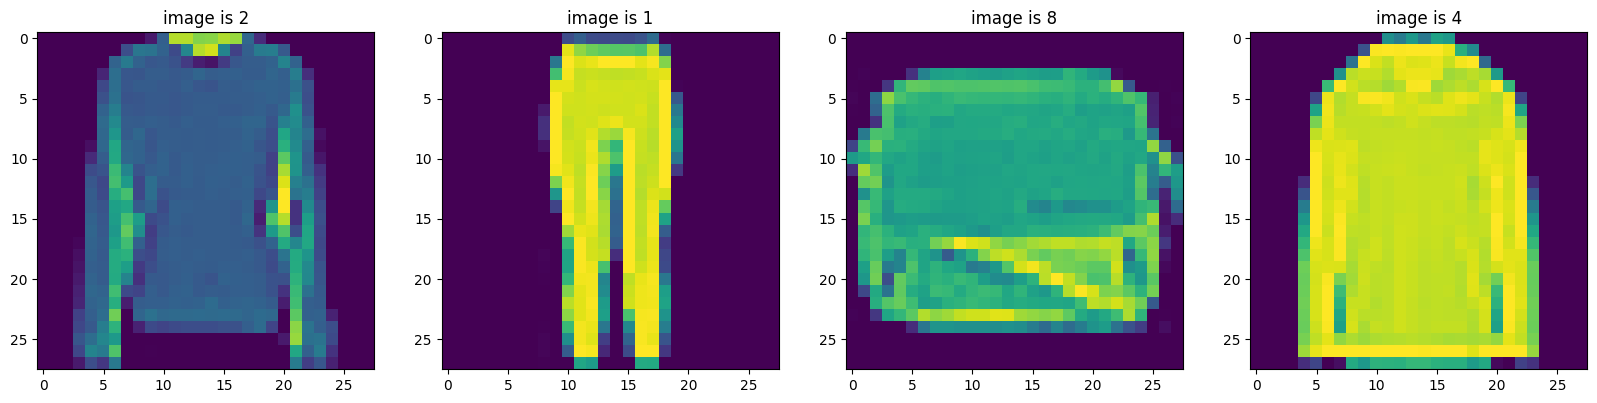

In [ ]:
fig , ax  = plt.subplots(ncols = 4 , figsize = (20,20))
for idx in range(4):
  batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(f"image is {batch['label']}")

In [ ]:
def scale_images(data):
  image = data['image']
  return image/255

In [ ]:
ds = tfds.load('fashion_mnist' , split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

## Build Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense ,Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D , UpSampling1D

In [ ]:
def build_generator():

  model = Sequential()
  model.add(Dense(7*7*128 ,  input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128 , 5 , padding ='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128 , 5 , padding ='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128 , 4 , padding ='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128 , 4 , padding ='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1 , 4 , padding = 'same' , activation = 'sigmoid'))
  return model

In [ ]:
generator = build_generator()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
img = generator.predict(np.random.randn(4,128 , 1))
img.shape

1/1 [==============================] - 2s 2s/step


(4, 28, 28, 1)

1/1 [==============================] - 0s 17ms/step


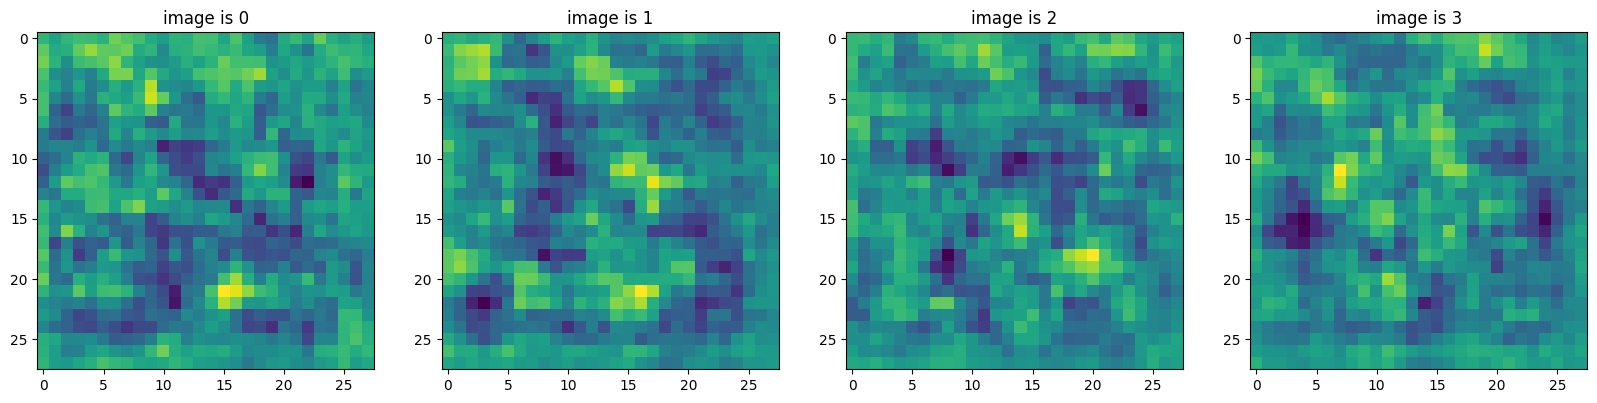

In [ ]:
img = generator.predict(np.random.randn(4,128 , 1))
fig , ax  = plt.subplots(ncols = 4 , figsize = (20,20))
for idx , img in enumerate(img):
  # batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(f"image is {idx}")

In [ ]:
def build_discriminator():
  model = Sequential()

  model.add(Conv2D(32 , 5 , input_shape = (28 , 28 ,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1 , activation = 'sigmoid'))

  return model

In [ ]:
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
img = generator.predict(np.random.randn(4,128 , 1))
discriminator.predict(img)

1/1 [==============================] - 0s 312ms/step


array([[0.49965358],
       [0.49964276],
       [0.49977124],
       [0.49969006]], dtype=float32)

## Custom training loop

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()

d_loss = BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self , generator, discriminator, *args, **kwargs ):
    super().__init__(*args , **kwargs)

    self.generator = generator
    self.discriminator = discriminator

  def compile(self , g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().compile(*args  ,**kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128 ,1)) , training = False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:

      yhat_real = self.discriminator(real_images ,training = True)
      yhat_fake = self.discriminator(fake_images , training = True)
      yhat_realfake = tf.concat([yhat_real , yhat_fake] , axis = 0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)] , axis = 0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real , noise_fake] , axis = 0)

      total_d_loss = self.d_loss(y_realfake , yhat_realfake)

    dgrad = d_tape.gradient(total_d_loss , self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad , self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:

      gen_images = self.generator(tf.random.normal((128 , 128,1)), training = True)

      predicted_labels = self.discriminator(gen_images , training = False)

      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    ggrad = g_tape.gradient(total_g_loss , self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad , self.generator.trainable_variables))
    return {"d_loss" : total_d_loss , "g_loss" : total_g_loss}

In [ ]:
fashgan = FashionGAN(generator , discriminator)

In [ ]:
fashgan.compile(g_opt , d_opt, g_loss, d_loss)

In [ ]:
# build callback

import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
  def __init__(self , num_img = 3, latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self , epoch , logs = None):
    random_latent_vectors = tf.random.uniform((self.num_img , self.latent_dim , 1) )
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *=255
    generated_images.numpy()

    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images' , f'generated_img_{epoch}_{i}.png'))

## train

In [ ]:
!mkdir images

In [ ]:
hist = fashgan.fit(ds , epochs =50 , callbacks = [ModelMonitor()] )

Epoch 1/50
  6/469 [..............................] - ETA: 1:17 - d_loss: 0.6953 - g_loss: 0.6939

469/469 [==============================] - 103s 179ms/step - d_loss: 0.4912 - g_loss: 1.1364
Epoch 2/50
469/469 [==============================] - 82s 175ms/step - d_loss: 0.4599 - g_loss: 2.4496
Epoch 3/50
469/469 [==============================] - 83s 177ms/step - d_loss: 0.6796 - g_loss: 0.7222
Epoch 4/50
469/469 [==============================] - 83s 177ms/step - d_loss: 0.6289 - g_loss: 0.5175
Epoch 5/50
469/469 [==============================] - 82s 175ms/step - d_loss: 0.7151 - g_loss: 0.3964
Epoch 6/50
469/469 [==============================] - 82s 176ms/step - d_loss: 0.6323 - g_loss: 0.5899
Epoch 7/50
469/469 [==============================] - 82s 175ms/step - d_loss: 0.6883 - g_loss: 0.4115
Epoch 8/50
469/469 [==============================] - 82s 175ms/step - d_loss: 0.6562 - g_loss: 0.5190
Epoch 9/50
469/469 [==============================] - 83s 176ms/step - d_loss: 0.6905 - g_loss: 0.5257
Epoch 10/50
469/469 [==============================] - 83s 177ms/step - d_loss: 0.6